In [234]:
!pip install --upgrade pip
!pip install pandas tqdm bs4 jieba wordcloud matplotlib


Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (19.3.1)


In [276]:
import csv
import requests
import json
import re
import time
import random
import jieba
import urllib.parse as up
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from tqdm import tqdm
from bs4 import BeautifulSoup
!pip install -U fake-useragent #爬蟲用
from fake_useragent import UserAgent
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: fake-useragent in /opt/conda/lib/python3.6/site-packages (0.1.11)


In [277]:
search = '宝洁中国'
query = up.quote_plus(search)
target_page = f'https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3D{query}&page_type=searchall&page=1'
headers = {'User-Agent': str(UserAgent().chrome)}
res = requests.get(target_page, headers=headers)
res_text = json.loads(res.text)


### 1. Get post words
- get all post_id by search query
- get all post words by post api

In [165]:
def requestPage(page, i):
    headers = {'User-Agent': str(UserAgent().chrome)}
    try:
        res = requests.get(page, headers=headers) #time.sleep(int(i)*random.randint(1,5)), 
#         while (res.text == ''):
#             print('response is null. Retrying...')
#             res = requests.get(page, time.sleep(int(i)*random.randint(5, 30)), headers=headers)
        res_text = json.loads(res.text)
    except Exception as e:
        print (i, 'error: ', e)
    else:
        return res_text

def getPostId(search):
    postIdList = []
    query = up.quote_plus(search)
    print(f'searching: {search} ...')
    for i in tqdm(range(1, 20)): # 預設找前20頁內容
        target_page = f'https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3D{query}&page_type=searchall&page={i}'
        res_text = requestPage(target_page, i)
        cards = res_text['data']['cards']
        if (len(cards) > 0):
            for num in range(1, len(cards)):
                try:
                    postIdList.append(cards[int(num)]['mblog']['id'])
                except:
                    postIdList.append(cards[int(num)]['card_group'][0]['mblog']['id'])
        else:
            print(f'search result ends at page {int(i)-1}')
            break
    return postIdList

def getPostWords(postIdList):
    postList = []
    for i, post_id in enumerate(postIdList):
        fullPost_page = f'https://m.weibo.cn/statuses/extend?id={post_id}'
        res_text = requestPage(fullPost_page, i+1)
        try:
            print(res_text['data']['longTextContent'])
            postList.append(res_text['data']['longTextContent'])
        except:
            print(i, ' - ', post_id)
    return postList

def htmlToText(postWordList):
    cleaned_list = []
    for p in postWordList:
        html = BeautifulSoup(p, 'html.parser')
        cleaned_list.append(html.text)
    return cleaned_list


In [265]:
postIdList = getPostId(search)
print(len(postIdList))
postWordList = getPostWords(postIdList)
print(postWordList)
cleaned_postWordList = htmlToText(postWordList)
print(cleaned_postWordList)


['昨天下午参加了一场特殊的好友聚会SNOWBERRY✖️基础颜究中国体验官见面啦🎉撒花🎉近年来各大集团都在找寻新的护肤IP纷纷预测哪个新兴品牌是下一个爆款来自于新西兰的天然抗老品牌：雪果就被宝洁集团快准狠的收入囊中天然护肤+进阶护理+专利成分专利技术10年0碳环保+不含各种刺激添加物让一个只有8支单品的小众护肤品牌进入我一个月前的测试名单（没错，我很早就拿到测试啦）当家的两支王牌单品蓝铜胜肽抗初老精华和超胜肽抗老精华都是走维稳+抗老的思路这次恰巧又见到了@三亩叔 正是基础颜究团队分享了精华渗透和功效方面的效果明年可以一起期待雪果的表现（名字真的太可爱了）好的产品，已经不仅仅是使用感美好那么简单成分，功效，是否复购，专利，技术，品牌背景已经越来越被用户所关注在护肤圈待的这几年，有一点感触颇深：了解得越多，心里越敬畏', '巴菲特的观点，跟老鬼有几分相似。巴菲特买大不买小，买老不买新，所有的重仓公司都是其所在行业的超级龙头和绝对老大，这些公司也是美国企业界的巨无霸。巴菲特不介入处于自由竞争阶段的行业和公司，他只买那些已经实现了完全的寡头垄断行业中的超核心龙头股。华盛顿邮报几乎是美国舆论媒体的旗帜；可乐、宝洁吉列、运通基本上这些企业都占据着整个行业的半壁江山。$贵州茅台 sh600519$ $中国平安 sh601318$ $五粮液 sz000858$', '2019宝洁校友年度盛會在上海完美落幕。宝洁大中華市區銷售和市場運營部及美髮護髮部品類業務總裁柯興華先生代表母校分享了新時代的新宝洁的近况，更重要的是傳達了公司對每位校友的謝意。他說：「宝洁中国的現在，有你們曾經的添磚加瓦。」祝福所有校友們，不忘初心，勇往前進。你們永遠是母校的驕傲。 ', '要有多强大的心脏，才能在热爱的道路上义无反顾？戳开视频宝洁中国的秒拍视频 就会发现，用爱发电的她们能量超强，无所不能！感谢@宝洁中国 邀约，京东愿意和你一起向#用爱发电的人瑞思拜# ，让我们一起为所有怀揣热爱前行的人打CALL！ ', '温馨提示，您的2019年余额已不足20天！#年底做个白日梦#放松一下，我在这里给大家送上这份《十二星座年终白日梦》指南，一起看看十二星座都在做怎样的白日梦？悄咪咪和我说说你的白日梦，大叔和@宝洁中国 帮你实现！网页链接戳链接立享满99送69超值好礼，宝洁家年华，和你一起净享美梦！（片尾有彩蛋哦）

### 2. generate wordcloud for viz
- jieba
- draw wordcloud

In [282]:
with open('stopwords.csv', 'r') as f:
    reader = csv.reader(f)
    stopwords_list = [r[0] for r in reader]

manual_stop_list = ['宝洁','中国',',','『 ','\n','{','}','-','|','(',')',',','˙','..','/','...','@','#','！','？']
for i in range(len(manual_stop_list)):
    stopwords_list.append(manual_stop_list[i])

def jieba_iter(post_list):
    jieba_results = []
    for post in tqdm(post_list):
        items = jieba.cut(post)
        for item in items:
            jieba_results.append(item)
    return jieba_results

def genWordcloud(post_list, relative_scaling=0.5):
    # With relative_scaling=0, only word-ranks are considered. With relative_scaling=1, a word that is twice as frequent will have twice the size. 
    jieba_list = jieba_iter(post_list)
#     text = text.split()
    stopwords = {}.fromkeys(stopwords_list) #設定不要計算的字
    counter = {}
    for i in jieba_list:
        if i in stopwords:
            continue
        if i in counter: # 計算非stopwords的出現頻次
            counter[i]+=1
        else:
            counter[i]=1

    font = 'font_ch.ttf'
    wc = WordCloud(background_color="white",font_path=font,
                   width = 1440,height = 900,relative_scaling=relative_scaling) 
    wc.generate_from_frequencies(counter)
    
    plt.figure(figsize=(20,20))
    plt.imshow(wc)
    plt.show()

    df_counter = pd.DataFrame.from_dict(counter, orient='index',columns = ['count'])
    df_counter = df_counter.sort_values('count',ascending = False)
#     df_counter.to_csv(f'wordCounter_{filename}.csv')
    print(df_counter.head(50))


100%|██████████| 106/106 [00:00<00:00, 2122.71it/s]


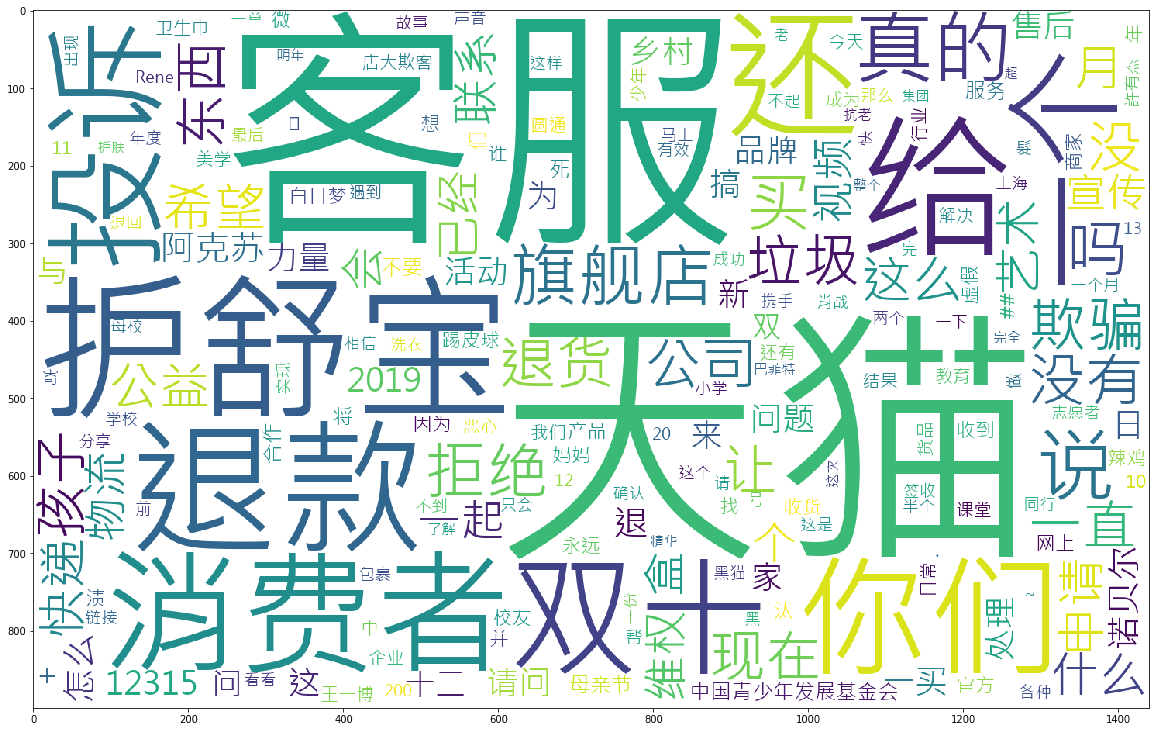

     count
       446
天猫      48
客服      44
护舒宝     37
给       36
退款      32
还       29
消费者     28
你们      27
双十      27
投诉      26
一个      24
真的      23
说       23
旗舰店     23
买       20
拒绝      19
吗       19
欺骗      17
没有      16
退货      16
垃圾      16
公司      15
没       15
现在      15
东西      14
让       14
一直      14
孩子      14
希望      13
这么      12
公益      12
申请      12
快递      12
什么      11
月       11
艺术      11
联系      11
维权      10
个       10
已经      10
会       10
盒       10
物流      10
怎么       9
视频       9
退        9
一起       9
宣传       9
诺贝尔      9


In [283]:
genWordcloud(cleaned_postWordList)

### 3. Add other data columns
- 留言
- 話題區
其他運用：
- 用戶
- 站外文章

In [78]:
# partialComments_page = f'https://m.weibo.cn/comments/hotflow?id=4448620344214233&mid={post_id}&max_id_type=0'
# 展開留言 https://m.weibo.cn/comments/hotFlowChild?cid=4448620407040596&max_id=0&max_id_type=0
res_text['data']['cards'][3]#['mblog']['id']

{'card_type': 9,
 'card_type_name': '微博',
 'itemid': 'seqid:1185320342|type:1|t:|pos:1-3-0|q:宝洁中国|ext:&cate=26&mid=4444608085669603&qri=140737488355328&qtime=1576379798&',
 'actionlog': {'act_code': 554,
  'ext': 'seqid:1185320342|type:1|t:|pos:1-3-0|q:宝洁中国|ext:&cate=26&mid=4444608085669603&qri=140737488355328&qtime=1576379798&',
  'luicode': '',
  'uicode': '',
  'fid': '100103type=1&q=宝洁中国',
  'lfid': ''},
 'display_arrow': 0,
 'show_type': 1,
 'mblog': {'visible': {'type': 0, 'list_id': 0},
  'created_at': '12-01',
  'id': '4444608085669603',
  'idstr': '4444608085669603',
  'mid': '4444608085669603',
  'can_edit': False,
  'show_additional_indication': 0,
  'text': '2019宝洁校友年度盛會在上海完美落幕。宝洁大中華市區銷售和市場運營部及美髮護髮部品類業務總裁柯興華先生代表母校分享了新時代的新宝洁的近况，更重要的是傳達了公司對每位校友的謝意。他說：「宝洁中国的現在，有你們曾經的添磚加瓦。」祝福所有校友們，不忘初心，勇往前進。你們永遠是母校的驕傲。 ',
  'textLength': 280,
  'source': 'iPhone 11 Pro Max',
  'favorited': False,
  'pic_types': '0,0,0,0,0,0,0,0,0',
  'thumbnail_pic': 'http://wx2.sinaimg.cn/thumbnail/681c459bgy1